# Implementing Simple Linear Regression From Scratch
- In this notebook i will build a simple linear regression algorithm from scratch by using oop concept.

In [1]:
#Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':[7,7]}, font_scale = 1.2)

In [2]:
#Reading the data
df = pd.read_csv('challenge_dataset.txt',sep =',',names = ['X','Y'])

In [3]:
#Displaying the first five rows from the data
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#Shape of the data
df.shape

(97, 2)

- No.of rows = 97
- No.of columns = 2

In [5]:
#Check the nulls
df.isna().sum()

X    0
Y    0
dtype: int64

- No missing values in the data.

In [6]:
#Statastical description of the data
df.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


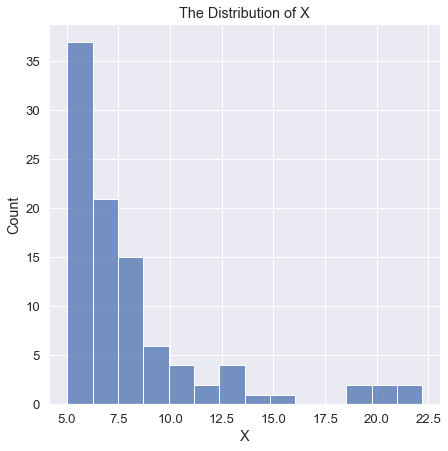

In [7]:
sns.histplot(df['X'])
plt.title('The Distribution of X')
plt.show()

- Most of the data in the interval of 5 to 6.
- There are empty intervals in this histogram and a few values in some intervals.

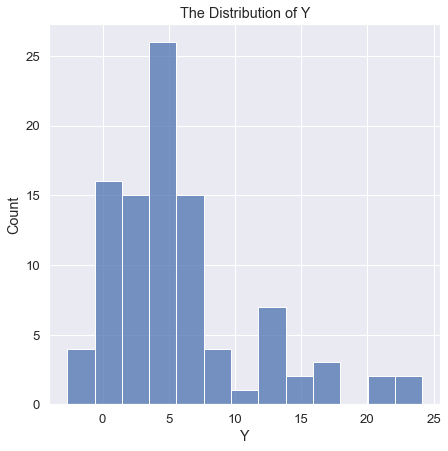

In [8]:
sns.histplot(df['Y'])
plt.title('The Distribution of Y')
plt.show()

- Most of the data are in the interval of 4 to 6.
- There are empty intervals in this histogram and a few values in some intervals.

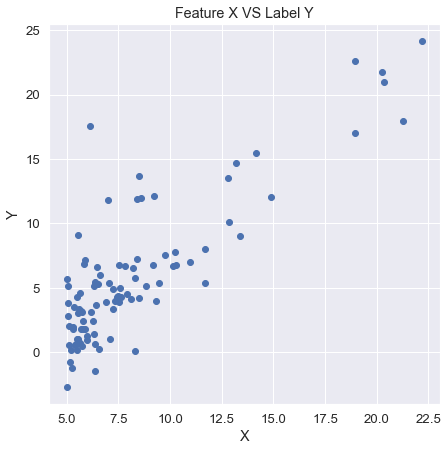

In [9]:
plt.figure(figsize = (7,7))
plt.scatter(df['X'],df['Y'])
plt.title('Feature X VS Label Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- From the above scatter plot we can see there are points in X have a low value but in Y have a high value, also we can see there are some extreme values which they are high in both of X and Y. 

In [10]:
#Shuffling the data
df_ = df.sample(frac = 1)
#Displaying the first five rows of the data after shuffling process
df_.head()

,X,Y
10,5.7107,3.2522
38,12.8360,10.1170
76,7.5386,3.8845
0,6.1101,17.5920
65,7.2182,4.8852


In [11]:
#Splitting the data for training and testing
x_train = df_['X'].iloc[ : 80].values
y_train = df_['Y'].iloc[ : 80].values
x_test  = df_['X'].iloc[80 : ].values
y_test  = df_['Y'].iloc[80 : ].values

In [12]:
#Displaying training and testing data
print('X Train: ', x_train)
print('Y Train: ', y_train)
print('X Test: ', x_test)
print('Y Test: ', y_test)

X Train:  [ 5.7107 12.836   7.5386  6.1101  7.2182  5.0702  7.6366  5.5649  7.8247
  6.3654  7.0708 11.7    22.203   5.5277  5.8707  6.5159  5.7737 18.959
 20.341   5.2524  5.0365  5.4369 14.908   5.6397  5.1077  5.8598  6.4862
  9.7687  5.734   6.8825 13.176   5.8014  5.3077  7.4764 13.394   7.0032
  8.8254  7.5402  5.3794  6.1891  7.2259  5.0594  6.3328 10.236   8.2951
  9.1802  7.6031  6.5894  8.5172  6.0062 14.164   7.4239  6.3557  5.7077
  6.3534  8.5781  5.5416  5.6407  5.0546 10.957   9.2482 21.279  10.136
  6.5479  8.2934  8.2111  7.3345  7.0931  5.4994  8.5186  5.1301  6.3589
  6.2742  6.4296  9.3102 18.945   5.1884 10.274   5.7292  5.1793]
Y Train:  [ 3.2522  10.117    3.8845  17.592    4.8852   5.1337   4.2959   3.0825
  6.7318   5.3048   5.3893   8.0043  24.147    9.1302   7.2029   5.3436
  2.4406  17.054   20.992   -1.22     5.7014   0.61705 12.054    4.6042
  2.0576   6.8233   6.5987   7.5435   3.1551   3.9115  14.692    1.844
  1.8396   4.3483   9.0551  11.854    5.1694 

In [13]:
#Displaying the shape and type of training and testing data
print(f'X Train Shape: {x_train.shape} and Type: {type(x_train)}')
print(f'Y Train Shape: {y_train.shape} and Type: {type(y_train)}')
print(f'X Test Shape: {x_test.shape}  and Type: {type(x_test)}')
print(f'Y Test Shape: {y_test.shape}  and Type: {type(y_test)}')

X Train Shape: (80,) and Type: <class 'numpy.ndarray'>
Y Train Shape: (80,) and Type: <class 'numpy.ndarray'>
X Test Shape: (17,)  and Type: <class 'numpy.ndarray'>
Y Test Shape: (17,)  and Type: <class 'numpy.ndarray'>


In [14]:
def MEAN(arr):
    '''
    This function for obtaining the mean from an array from scratch.
    INPUT:
    arr: numpy.ndarray. The array.
    OUTPUT:
    The mean of the given array.
    '''
    sum_ = 0
    length = len(arr)
    for idx in range(length):
        sum_ += arr[idx]
    return sum_ / length

def standard_deviation(arr):
    '''
    This function for obtaining the standard deviation from an array from scratch.
    INPUT:
    arr: numpy.ndarray. The array.
    OUTPUT:
    The standard deviation of the given array.
    '''
    sum_ = 0
    length = len(arr)
    arr_mean = MEAN(arr)
    for idx in range(length):
        sum_ += ((arr[idx] - arr_mean) ** 2)
    return (sum_ / (length - 1)) ** 0.5

def covariance(x, y):
    '''
    This function for calculating the covariance.
    INPUT:
    x: numpy.ndarray. The x feature.
    y: numpy.ndarray. The label.
    OUTPUT:
    Covariance value.
    '''
    length = len(x)
    sum_ = 0
    x_mean = MEAN(x)
    y_mean = MEAN(y)
    for idx in range(length):
        sum_ += ((x[idx] - x_mean) * (y[idx] - y_mean))
    return sum_ / (length - 1)

def correlation(x, y):
    '''
    This function for calculating the correlation.
    INPUT:
    x: numpy.ndarray. The x feature.
    y: numpy.ndarray. The label.
    OUTPUT:
    correlation value.
    '''
    cov = covariance(x, y)
    std_x = standard_deviation(x)
    std_y = standard_deviation(y)
    return cov / (std_x * std_y)

In [15]:
#The correlation between X and Y
x = df["X"].values
y = df["Y"].values
correlation(x,y)

0.837873232526341

- From the above correlation value, the correlation between X and Y is a strong positive correlation.

In [16]:
class Regression:

    @classmethod
    def fit(cls, x_train, y_train):
        '''
        This class method for calculating B0 and B1
        INPUT:
        x_train: numpy.ndarray. The training part from x.
        y_train: numpy.ndarray. The training part from y.
        '''
        numerator_val = 0
        denominator_val = 0
        x_mean = MEAN(x_train)
        y_mean = MEAN(y_train)
        for idx in range(len(x_train)):
            numerator_val += ((x_train[idx] - x_mean) * (y_train[idx] - y_mean))
            denominator_val += ((x_train[idx] - x_mean) ** 2)
        cls.B1 = numerator_val / denominator_val
        cls.B0 = y_mean - cls.B1 * x_mean
    
    @classmethod
    def predict(cls, x_test):
        '''
        This class method for predicting the y_test values by using x_test values.
        INPUT:
        x_test: numpy.ndarray. The testing part from x.
        OUTPUT:
        The predicted values.
        '''
        y_pred = []
        for idx in range(len(x_test)):
            y_pred.append(cls.B0 + cls.B1 * x_test[idx])
        return y_pred
    
    @staticmethod
    def evaluate(y_pred,y_actual):
        ''''
        This static method for evaluating the model by calculating the mean squared error.
        INPUT:
        y_pred: list. The predicted values.
        y_actual: numpy.ndarray. The testing part from y.
        OUTPUT:
        Mean squared error value.
        '''
        length = len(y_pred)
        sum_ = 0
        for idx in range(length):
            sum_ += ((y_actual[idx] - y_pred[idx]) ** 2)
        print(f'The Model Evaluation by using MSE = {sum_ / length}')
    
    @staticmethod
    def accuracy(y_pred, y_actual):
        '''
        This static method for calculating the accuracy of the model.
        INPUT:
        y_pred: list. The predicted values.
        y_actual: numpy.ndarray. The testing part from y.
        OUTPUT:
        The value of r2 score.
        '''
        rss = 0
        tss = 0
        y_mean = MEAN(y_actual)
        for idx in range(len(y_pred)):
            rss += ((y_pred[idx] - y_actual[idx]) ** 2)
            tss += ((y_actual[idx] - y_mean) ** 2)
        print(f'The Accuracy of the model = {1 - (rss / tss)}')

In [17]:
#Taking an object from the class
reg = Regression()

In [18]:
#Fitting process
reg.fit(x_train,y_train)

In [19]:
#Predicted values
y_pred = reg.predict(x_test)
y_pred

[3.312747719756832,
 2.8463725187908393,
 11.365701837108885,
 2.631935128652878,
 6.234529723120083,
 7.4480108285461615,
 6.2049241278384475,
 2.7497770079111516,
 3.4406903315229567,
 20.005891644400194,
 2.3085955880279627,
 2.8815509320078414,
 5.683052948266095,
 10.06537765219001,
 3.816971642533857,
 2.981281152976173,
 5.8717160554529855]

In [20]:
#Evaluating the model
reg.evaluate(y_pred,y_test)

The Model Evaluation by using MSE = 7.13992388099542


In [21]:
#Model accuracy
reg.accuracy(y_pred,y_test)

The Accuracy of the model = 0.7780489441057344


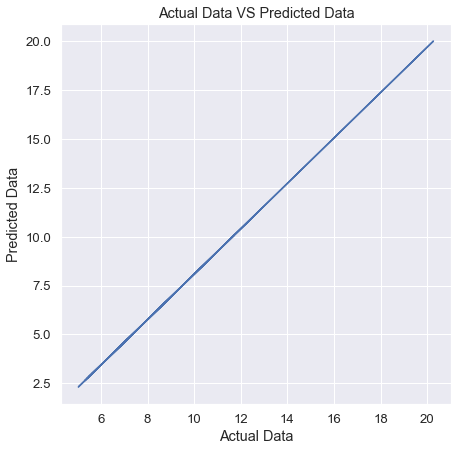

In [22]:
plt.plot(x_test,y_pred)
plt.title('Actual Data VS Predicted Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()